# Interpolation Options

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 9)

## Piecewise Linear

$$
\eta_s(\boldsymbol{\alpha}) = 1 + \sum_{p\in \mathrm{Syst}}I_\mathrm{lin}(\alpha_p;1,\eta_{sp}^+,\eta_{sp}^-)
$$

and for shape interpolation it is
$$
\sigma_{sb}(\boldsymbol{\alpha}) = \sigma_{sb}^0 + \sum_{p\in \mathrm{Syst}}I_\mathrm{lin}(\alpha_p;\sigma_{sb}^0,\sigma_{sb}^+,\eta_{sb}^-)
$$

with 
$$
I_\mathrm{lin}(\alpha;I^0,I^+,I^-)=\begin{cases}\alpha(I^+-I^0) \,\, \alpha\geq0\\ \alpha(I^0-I^-) \,\, \alpha< 0\end{cases}
$$

### Python Implementation

In [2]:
def PiecewiseLinear(alpha, I0, Iup, Idown):
    if alpha < 0:
        return (1 + alpha*(I0-Idown))
    else:
        return (1 + alpha*(Iup - I0))

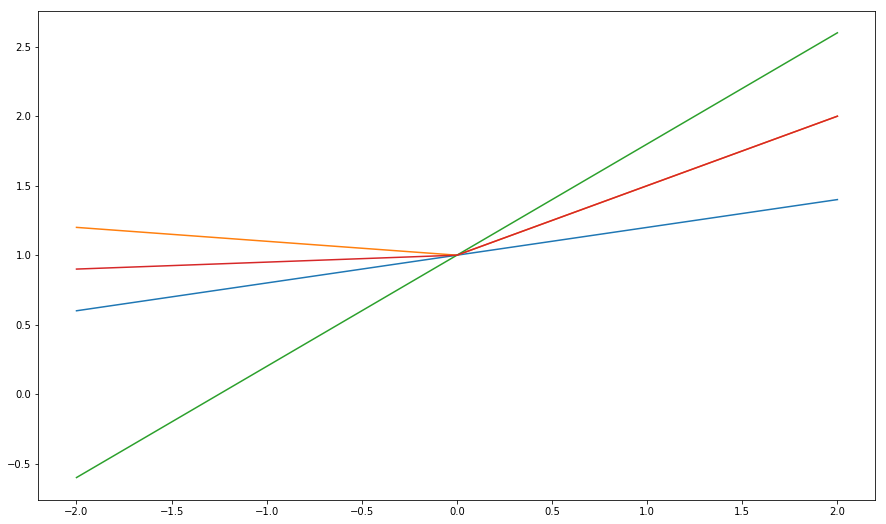

In [3]:
points = 41
xmin, xmax = -2, 2
xlist = np.linspace(xmin,xmax,points)
one = map(lambda y: PiecewiseLinear(y, 1, 1.2, .8), xlist)
plt.plot(xlist, one)
two = map(lambda y: PiecewiseLinear(y, 1, 1.5, 1.1), xlist)
plt.plot(xlist, two)
three = map(lambda y: PiecewiseLinear(y, 1, 1.8, .2), xlist)
plt.plot(xlist, three)
four = map(lambda y: PiecewiseLinear(y, 1, 1.5, .95), xlist)
plt.plot(xlist, four)
plt.show()

## Piecewise Exponential

$$
\eta_s(\boldsymbol{\alpha}) = 1 + \prod_{p\in \mathrm{Syst}}I_\mathrm{exp}(\alpha_p;1,\eta_{sp}^+,\eta_{sp}^-)
$$

and for shape interpolation it is
$$
\sigma_{sb}(\boldsymbol{\alpha}) = \sigma_{sb}^0 + \sum_{p\in \mathrm{Syst}}I_\mathrm{exp}(\alpha_p;\sigma_{sb}^0,\sigma_{sb}^+,\eta_{sb}^-)
$$

with 
$$
I_\mathrm{exp}(\alpha;I^0,I^+,I^-)=\begin{cases}(I^+/I^0)^\alpha \,\, \alpha\geq0\\ (I^0/I^-)^{-\alpha} \,\, \alpha< 0\end{cases}
$$

### Python Implementation

In [4]:
def PiecewiseExponential(alpha, I0, Iup, Idown):
    if alpha < 0:
        return pow((Idown / I0),-alpha)
    else:
        return pow((Iup / I0),alpha)

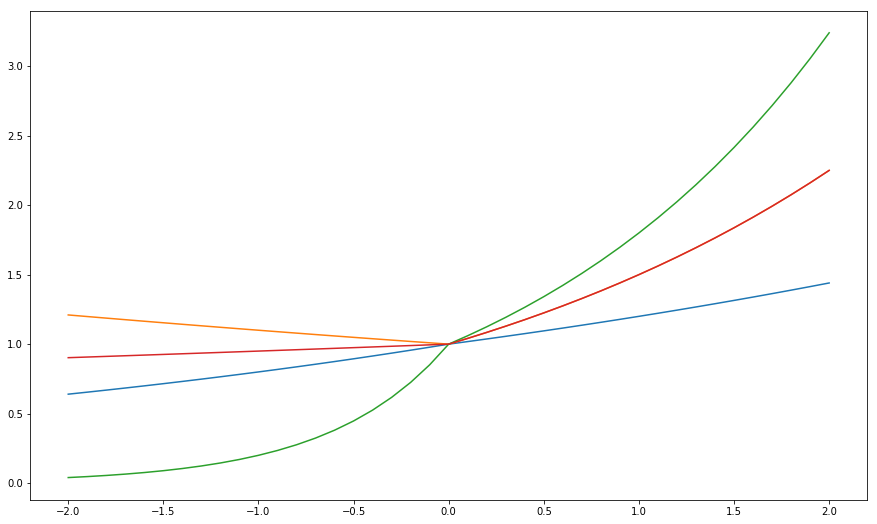

In [5]:
points = 41
xmin, xmax = -2, 2
xlist = np.linspace(xmin,xmax,points)
one = map(lambda y: PiecewiseExponential(y, 1, 1.2, .8), xlist)
plt.plot(xlist, one)
two = map(lambda y: PiecewiseExponential(y, 1, 1.5, 1.1), xlist)
plt.plot(xlist, two)
three = map(lambda y: PiecewiseExponential(y, 1, 1.8, .2), xlist)
plt.plot(xlist, three)
four = map(lambda y: PiecewiseExponential(y, 1, 1.5, .95), xlist)
plt.plot(xlist, four)
plt.show()

## Quadratic Interpolation and Linear Extrapolation

$$
\eta_s(\boldsymbol{\alpha}) = 1 + \sum_{p\in \mathrm{Syst}}I_\mathrm{quad|lin}(\alpha_p;1,\eta_{sp}^+,\eta_{sp}^-)
$$

and for shape interpolation it is
$$
\sigma_{sb}(\boldsymbol{\alpha}) = \sigma_{sb}^0 + \sum_{p\in \mathrm{Syst}}I_\mathrm{quad|lin}(\alpha_p;\sigma_{sb}^0,\sigma_{sb}^+,\eta_{sb}^-)
$$

with 
$$
I_\mathrm{quad|lin}(\alpha;I^0,I^+,I^-)=\begin{cases}(b + 2a)(\alpha - 1) +I^+ - I^0 \,\, \alpha\gt 1 \\ a\alpha^2+b\alpha \; \; \; \; |\alpha|\leq 1\\ (b-2a)(\alpha +1) +I^- - I^0 \,\, \alpha < -1\end{cases}
$$
and 
$$
a=\frac{1}{2}(I^++I^-)-I^0\;\;\; \mathrm{and}\;\;\;b = \frac{1}{2}(I^+-I^-)
$$

### Python Implementation

In [6]:
def QuadInterLinExtra(alpha, I0, Iup, Idown):
    a = (Iup + Idown)/2. - I0
    b = (Iup - Idown)/2.
    if alpha > 1.:
        return (1. + (b + 2.*a)*(alpha - 1.) + Iup - I0)
    elif alpha < -1.:
        return (1. + (b - 2.*a)*(alpha + 1.) + Idown - I0)
    else:
        return (1. + (a*alpha*alpha + b*alpha))

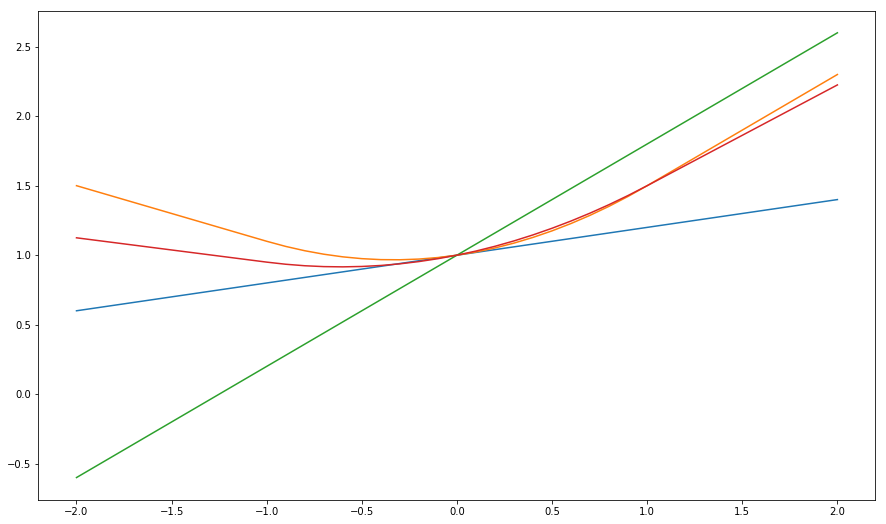

In [7]:
points = 41
xmin, xmax = -2, 2
xlist = np.linspace(xmin,xmax,points)
one = map(lambda y: QuadInterLinExtra(y, 1., 1.2, .8), xlist)
plt.plot(xlist, one)
two = map(lambda y: QuadInterLinExtra(y, 1., 1.5, 1.1), xlist)
plt.plot(xlist, two)
three = map(lambda y: QuadInterLinExtra(y, 1., 1.8, .2), xlist)
plt.plot(xlist, three)
four = map(lambda y: QuadInterLinExtra(y, 1., 1.5, .95), xlist)
plt.plot(xlist, four)
plt.show()

## Polynomial Interpolation and Exponential Extrapolation

The strategy of this interpolation option is to use the piecewise exponential extrapolation as above with a polynomial interpolation that matches $\eta(\alpha = \pm\alpha_0)$, $d\eta/d\alpha|_{\alpha=\pm\alpha_0}$ , and $d^2\eta/d\alpha^2|_{\alpha=\pm\alpha_0}$ and the boundary $\pm\alpha_0$ is defined by the user (with default $\alpha_0 = 1$).

$$
\eta_s(\boldsymbol{\alpha}) = \prod_{p\in \mathrm{Syst}}I_\mathrm{poly|exp}(\alpha_p;1,\eta_{sp}^+,\eta_{sp}^-,\alpha_0)
$$

and for shape interpolation it is
$$
\sigma_{sb}(\boldsymbol{\alpha}) = \sigma_{sb}^0 \sum_{p\in \mathrm{Syst}}I_\mathrm{poly|exp}(\alpha_p;\sigma_{sb}^0,\sigma_{sb}^+,\eta_{sb}^-,\alpha_0)
$$

with 
$$
I_\mathrm{poly|exp}(\alpha;I^0,I^+,I^-,\alpha_0)=\begin{cases}(I^+/I^0)^\alpha \; \; \alpha\geq -\alpha_0 \\ 1 + \sum_{i=1}^6a_i\alpha^i \; \; |\alpha|\lt \alpha_0 \\ (I^-/I^0)^{-\alpha} \; \; \alpha\leq -\alpha_0 \end{cases}
$$
and the $a_i$ are fixed by the boundary conditions described above.

### Python Implementation

In [8]:
def PolyInterpValue(alpha, I0, Iup, Idown, alpha0 = 0):
    polycoeff = np.zeros(6)
    pow_up       =  pow(Iup/I0, alpha0)
    pow_down     =  pow(Idown/I0,  alpha0)
    logHi        =  math.log(Iup)  
    logLo        =  math.log(Idown )
    
    pow_up_log   = 0.0 if Iup <= 0.0 else pow_up * logHi
    pow_down_log = 0.0 if Idown <= 0.0 else -pow_down * logLo
    pow_up_log2  = 0.0 if Iup <= 0.0 else pow_up_log * logHi
    pow_down_log2= 0.0 if Idown <= 0.0 else -pow_down_log * logLo

    S0 = (pow_up+pow_down)/2
    A0 = (pow_up-pow_down)/2
    S1 = (pow_up_log+pow_down_log)/2
    A1 = (pow_up_log-pow_down_log)/2
    S2 = (pow_up_log2+pow_down_log2)/2
    A2 = (pow_up_log2-pow_down_log2)/2
    a = 1./(8*alpha0) * (15*A0 - 7*alpha0*S1 + alpha0*alpha0*A2)
    b = 1./(8*alpha0*alpha0) * (-24 + 24*S0 - 9*alpha0*A1 + alpha0*alpha0*S2)
    c = 1./(4*pow(alpha0, 3))*( -5*A0 + 5*alpha0*S1 - alpha0*alpha0*A2)
    d = 1./(4*pow(alpha0, 4))*( 12 - 12*S0 +  7*alpha0*A1 - alpha0*alpha0*S2)
    e = 1./(8*pow(alpha0, 5))*(    +  3*A0 -  3*alpha0*S1 + alpha0*alpha0*A2)
    f = 1./(8*pow(alpha0, 6))*( -8 +  8*S0 -  5*alpha0*A1 + alpha0*alpha0*S2)
   
   # evaluate the 6-th degree polynomial using Horner's method
    return 1. + x * (a + x * ( b + x * ( c + x * ( d + x * ( e + x * f ) ) ) ) )

In [9]:
def PolyInterExpExtra(alpha, I0, Iup, Idown, alpha0 = 0):
    if alpha >= alpha0 :
        return pow(Iup/I0, alpha)
    elif alpha <= alpha0:
        return pow(Idown/I0, -alpha)
    elif x != 0:
        return PolyInterpValue(alpha, I0, Iup, Idown, alpha0 = 0)

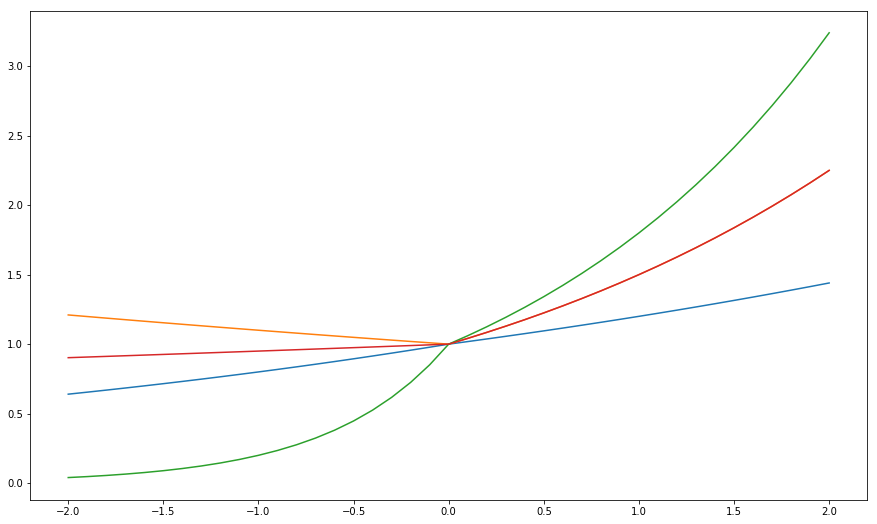

In [10]:
points = 41
xmin, xmax = -2, 2
xlist = np.linspace(xmin,xmax,points)
one = map(lambda y: PolyInterExpExtra(y, 1., 1.2, .8), xlist)
plt.plot(xlist, one)
two = map(lambda y: PolyInterExpExtra(y, 1., 1.5, 1.1), xlist)
plt.plot(xlist, two)
three = map(lambda y: PolyInterExpExtra(y, 1., 1.8, .2), xlist)
plt.plot(xlist, three)
four = map(lambda y: PolyInterExpExtra(y, 1., 1.5, .95), xlist)
plt.plot(xlist, four)
plt.show()

## Plot together

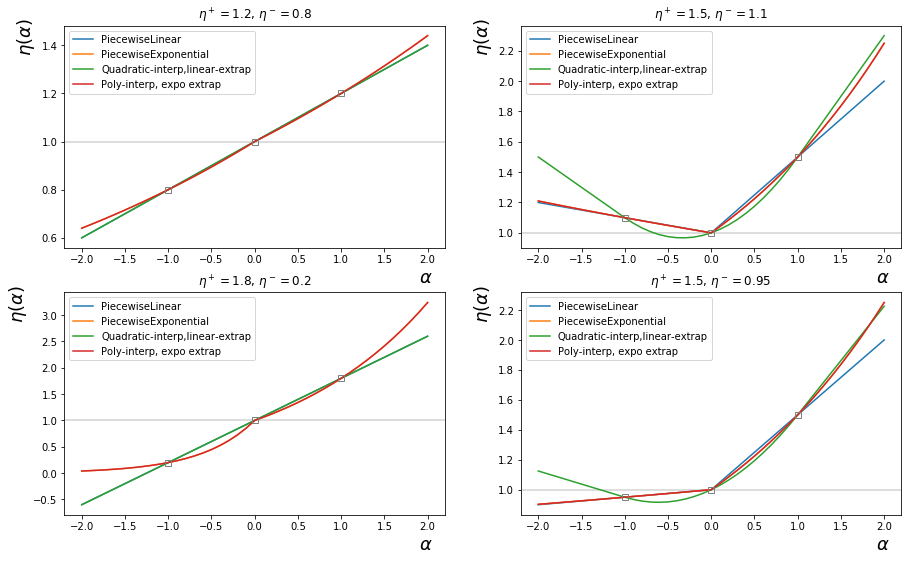

In [11]:
plt.close('all')
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

points = 41
xmin, xmax = -2, 2
xlist = np.linspace(xmin,xmax,points)

# First plot 1 +/- .2
nom = 1
up = 1.2
down = .8

xshort = [-1,0,1]
yshort = [down,nom,up]
lin1 = map(lambda y: PiecewiseLinear(y, nom, up, down), xlist)
exp1 = map(lambda y: PiecewiseExponential(y, nom, up, down), xlist)
quadinterlinextra1 = map(lambda y: QuadInterLinExtra(y, nom, up, down), xlist)
polyinterexpextra1 = map(lambda y: PolyInterExpExtra(y, nom, up, down), xlist)

ax1.axhline(y=1., xmin=-2, xmax=2, color = 'lightgrey')
ax1.set_title(r'$\eta^+=1.2$, $\eta^-=0.8$')
ax1.set_xlabel(r'$\alpha$',position=(0.95,1), fontsize=18)
ax1.set_ylabel(r'$\eta(\alpha)$', fontsize=18, position=(0,0.95))

ax1.plot(xlist, lin1, label='PiecewiseLinear')
ax1.plot(xlist, exp1, label='PiecewiseExponential')
ax1.plot(xlist, quadinterlinextra1, label='Quadratic-interp,linear-extrap')
ax1.plot(xlist, polyinterexpextra1, label = 'Poly-interp, expo extrap')
ax1.plot(xshort, yshort, linestyle=' ', marker='s', color='grey', markerfacecolor='none')
legend1 = ax1.legend(loc='upper left')

#second 1 +/-[1.1,1.5]
nom = 1
up = 1.5
down = 1.1
yshort = [down,nom,up]

lin2 = map(lambda y: PiecewiseLinear(y, nom, up, down), xlist)
exp2 = map(lambda y: PiecewiseExponential(y, nom, up, down), xlist)
quadinterlinextra2 = map(lambda y: QuadInterLinExtra(y, nom, up, down), xlist)
polyinterexpextra2 = map(lambda y: PolyInterExpExtra(y, nom, up, down), xlist)

ax2.axhline(y=1., xmin=-2, xmax=2, color = 'lightgrey')
ax2.set_title(r'$\eta^+=1.5$, $\eta^-=1.1$')
ax2.set_xlabel(r'$\alpha$',position=(0.95,1), fontsize=18)
ax2.set_ylabel(r'$\eta(\alpha)$', fontsize=18, position=(0,0.95))

ax2.plot(xlist, lin2, label='PiecewiseLinear')
ax2.plot(xlist, exp2, label='PiecewiseExponential')
ax2.plot(xlist, quadinterlinextra2, label='Quadratic-interp,linear-extrap')
ax2.plot(xlist, polyinterexpextra2, label = 'Poly-interp, expo extrap')
ax2.plot(xshort, yshort, linestyle=' ', marker='s', color='grey', markerfacecolor='none')
legend2 = ax2.legend(loc='upper left')

# third 1 +/-[.2,1.8]
nom = 1
up = 1.8
down = .2
yshort = [down,nom,up]

lin3 = map(lambda y: PiecewiseLinear(y, nom, up, down), xlist)
exp3 = map(lambda y: PiecewiseExponential(y, nom, up, down), xlist)
quadinterlinextra3 = map(lambda y: QuadInterLinExtra(y, nom, up, down), xlist)
polyinterexpextra3 = map(lambda y: PolyInterExpExtra(y, nom, up, down), xlist)

ax3.axhline(y=1., xmin=-2, xmax=2, color = 'lightgrey')
ax3.set_title(r'$\eta^+=1.8$, $\eta^-=0.2$')
ax3.set_xlabel(r'$\alpha$',position=(0.95,1), fontsize=18)
ax3.set_ylabel(r'$\eta(\alpha)$', fontsize=18, position=(0,0.95))

ax3.plot(xlist, lin3, label='PiecewiseLinear')
ax3.plot(xlist, exp3, label='PiecewiseExponential')
ax3.plot(xlist, quadinterlinextra3, label='Quadratic-interp,linear-extrap')
ax3.plot(xlist, polyinterexpextra3, label = 'Poly-interp, expo extrap')
ax3.plot(xshort, yshort, linestyle=' ', marker='s', color='grey', markerfacecolor='none')
legend3 = ax3.legend(loc='upper left')

#fourth 1+/-[0.95,1.5]
nom = 1
up = 1.5
down = .95
yshort = [down,nom,up]

lin4 = map(lambda y: PiecewiseLinear(y, nom, up, down), xlist)
exp4 = map(lambda y: PiecewiseExponential(y, nom, up, down), xlist)
quadinterlinextra4 = map(lambda y: QuadInterLinExtra(y, nom, up, down), xlist)
polyinterexpextra4 = map(lambda y: PolyInterExpExtra(y, nom, up, down), xlist)

ax4.axhline(y=1., xmin=-2, xmax=2, color = 'lightgrey')
ax4.set_title(r'$\eta^+=1.5$, $\eta^-=0.95$')
ax4.set_xlabel(r'$\alpha$',position=(0.95,.1), fontsize=18)
ax4.set_ylabel(r'$\eta(\alpha)$', fontsize=18, position=(0,0.95))

ax4.plot(xlist, lin4, label='PiecewiseLinear')
ax4.plot(xlist, exp4, label='PiecewiseExponential')
ax4.plot(xlist, quadinterlinextra4, label='Quadratic-interp,linear-extrap')
ax4.plot(xlist, polyinterexpextra4, label = 'Poly-interp, expo extrap')
ax4.plot(xshort, yshort, linestyle=' ', marker='s', color='grey', markerfacecolor='none')
legend4 = ax4.legend(loc='upper left')

plt.show()